# Assessment Problems

Python project that downloads FAANG stock data, plots it, automates execution via a script, and schedules it weekly with GitHub Actions.

Author: Carmine Giardino

In [1]:
# Importing libraries

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# File system operations
import os

#  Yahoo Finance yfinance module to fetch stock data
import yfinance as yf

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Matplotlib date formatting
import matplotlib.dates as mdates

## Problem 1: Data from yFinance

Function `get_data()` uses [yfinance](https://github.com/ranaroussi/yfinance) Python package to:

1. Download hourly stock data for the past 5 days for FAANG (META, AAPL, AMZN, NFLX, GOOG).

2. Save results as a CSV in a data/ folder (create it if missing).

The filename format is `YYYYMMDD-HHmmss.csv` (date and time of save).

In [2]:
def get_data():
    # FAANG tickers
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
    
    # Download data for the past 5 days for FAANG
    # https://ranaroussi.github.io/yfinance#ticker
    data = yf.download(tickers, period="5d", interval="1h", auto_adjust=True)
    
    # Ensure data/ directory exists
    os.makedirs("data", exist_ok=True)
    
    # Create filename with the current date and time
    # https://docs.python.org/3/library/datetime.html
    # Getting current date and time for filename with format YYYYMMDD-HHmmss
    # https://docs.python.org/3/library/datetime.html#datetime.datetime.now
    filename = dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
    
    # Creating a full file path (including the filename) for saving the stock data
    filepath = os.path.join("data", filename)
    
    # Saving the CSV file in the data folder with name as per the specified format
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
    data.to_csv(filepath)
    
    print(f"Data saved to {filepath}")
    print (data.head())

Saving the fetched stock data to a CSV file  


In [3]:
# Calling the function to download the data and save it as a CSV file
get_data()

[*********************100%***********************]  5 of 5 completed

Data saved to data/20251127-165027.csv
Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-20 14:30:00+00:00  273.904999  226.410004  304.820007  602.340027   
2025-11-20 15:30:00+00:00  271.779999  223.740005  300.279999  593.700012   
2025-11-20 16:30:00+00:00  268.940002  219.460007  295.269989  587.426025   
2025-11-20 17:30:00+00:00  268.809998  219.833893  295.619995  589.359985   
2025-11-20 18:30:00+00:00  267.795013  219.570007  292.785004  586.578125   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-20 14:30:00+00:00  109.169998  275.429993  227.184998  305.540009   
2025-11-20 15:30:00+00:00  108.31500

## Problem 2: Plotting Data

Function `plot_data()` loads the latest CSV in the `data` folder, plots `Close` prices for all five FAANG stocks with labels, legend, and date as the title.
Then it saves the plot in a `plots` folder as `YYYYMMDD-HHmmss.png` by creating the folder if it doesn't exist.

In [4]:
# Function to plot data from the latest CSV file
def plot_data():
    # Get the list of files in the data folder
    # https://docs.python.org/3/library/os.html#os.listdir
    list_data_files = os.listdir("data")
    if not list_data_files:
        # If no csv file exists, return
        print("No CSV files found in data/")
        return
    # Sort the list of files in reverse order (most recent first)
    # https://docs.python.org/3/tutorial/datastructures.html#sorting-lists
    list_data_files.sort(reverse=True)
    # Get the last data file path
    latest_data_file_path = os.path.join("data", list_data_files[0])

    # Load the latest CSV into a DataFrame
    # The headers are the first two rows of the CSV file (i.e. the ticker symbols and the price types)
    # The index is the date/time column, and the columns are the ticker symbols
    # Setting parse_dates=True will convert the date/time column to a datetime object
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    df = pd.read_csv(latest_data_file_path, header=[0,1], index_col=0, parse_dates=True)

    # Extract DataFrame with all Close prices for each FAANG ticker
    close_prices_df = df['Close']  
    
    # Create a new figure and axis
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    fix, ax = plt.subplots()
    
    # Plot Close prices for all available tickers using pandas built-in plotting
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-with-matplotlib
    close_prices_df.plot(figsize=(12, 6), grid=True, title="FAANG Close Prices", ax=ax)
    
    # Set major ticks to daily intervals
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    ax.xaxis.set_major_locator(mdates.DayLocator())
    # Set x-axis date format to YYYY-MM-DD
    # https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.DateFormatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Add axis labels on the x-axis with a bit of padding
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
    ax.set_xlabel("Date (YYYY-MM-DD)", labelpad=10)
    
    # Add axis labels on the y-axis
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
    ax.set_ylabel("Close Price (USD)")
    
    # Add a legend with ticker names 
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
    # Note adding the legend outside the plot area to the right in the center of the plot
    ax.legend(title="Ticker", loc="center left", bbox_to_anchor=(1, 0.5))

    # Create the plots folder if it doesn't exist'
    # https://docs.python.org/3/library/os.html
    os.makedirs("plots", exist_ok=True)
    
    # Extract the filename without extension from the latest data file path
    # https://docs.python.org/3/library/os.path.html#os.path.splitext
    filename = os.path.splitext(os.path.basename(latest_data_file_path))[0]
    
    # Format the filename to use png extension
    out_path = f"plots/{filename}.png"
    
    # Save the plot as a PNG file with dpi 300 for better quality
    # If the file already exists, it will be overwritten
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    plt.savefig(fname=out_path, dpi=300)
    
    # Display the plot
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
    plt.show()
    
    # Close the plot to free up memory
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.close.html
    plt.close()

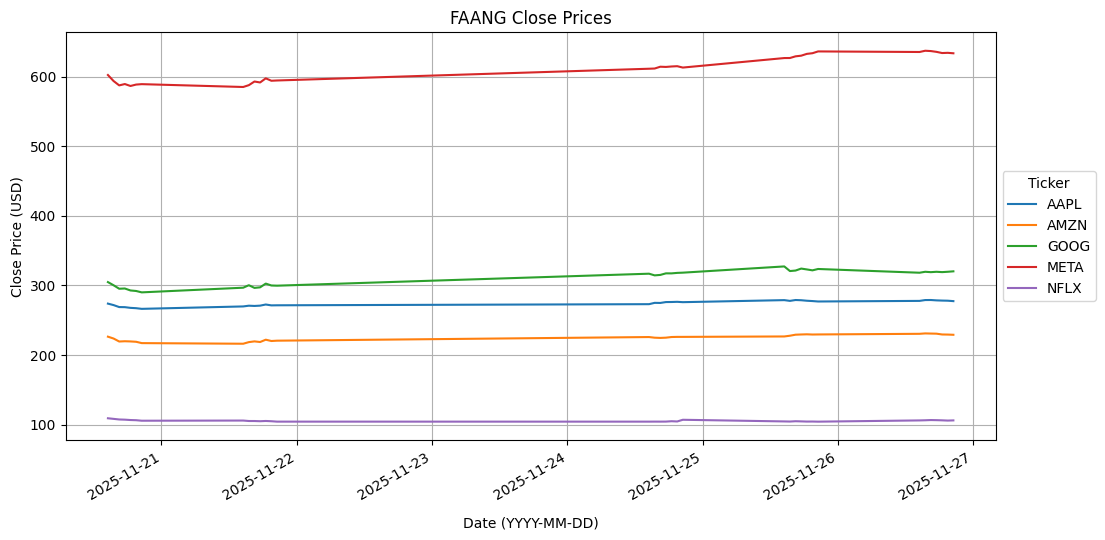

In [5]:
# Calling the function to generate the plot in the plots folder
plot_data()

## Problem 3: Script

Script `faang.py` in the repo root contains the two functions (`get_data()` and `plot_data()`). It can be run by `./faang.py` from the terminal to download the data and generate the plot.

## Problem 4: Automation

GitHub Actions workflow (`faang.yml`) inside `.github/workflows/` runs `faang.py` every Saturday morning.

## End